In [4]:
import pandas as pd 
from collections import Counter
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plot
from wordcloud import WordCloud
from plotly.offline import init_notebook_mode
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
sns.set()


In [5]:
p = "YlOrBr"
p2 = "OrRd"
p3 = "RdYlBu"

jobDetailsDF = pd.read_csv("C:\\Users\\Sai Kiran\\Desktop\\ML_ASSIGNMENT1_BATCh_61\\jobs.csv",engine='python')
jobDetailsDF.head()
jobDetailsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 28 columns):
Job ID                           3020 non-null int64
Agency                           3020 non-null object
Posting Type                     3020 non-null object
# Of Positions                   3020 non-null int64
Business Title                   3020 non-null object
Civil Service Title              3020 non-null object
Title Code No                    3020 non-null object
Level                            3020 non-null object
Job Category                     3018 non-null object
Full-Time/Part-Time indicator    2811 non-null object
Salary Range From                3020 non-null float64
Salary Range To                  3020 non-null float64
Salary Frequency                 3020 non-null object
Work Location                    3020 non-null object
Division/Work Unit               3020 non-null object
Job Description                  3020 non-null object
Minimum Qual Requirements    

In [ ]:
##Data cleaning & Feature engineering

In [6]:
def wordcloudForCategories(text):
    wordcloud = WordCloud(background_color='white',
                     width=1024, height=720).generate(text)
    plot.clf()
    plot.imshow(wordcloud, interpolation="bilinear")
    plot.axis('off')
    plot.show()

def categoriesParsing(x):
    l = x.replace('&', ',').split(',')
    l = [x.strip().rstrip(',') for x in l]
    key_categories.extend(l)

def keyWordsAnalyse(x, l):
    x = x.lower()
    tokens = nltk.word_tokenize(x)
    stop_words = set(stopwords.words('english'))
    token_l = [w for w in tokens if not w in stop_words and w.isalpha()]
    l.extend(token_l)
    
def requiredSkillSet(x):
    kwl = []
    jobDetailsDF[jobDetailsDF.job_category==x].requiredSkillSet.dropna().apply(keyWordsAnalyse, l=kwl)
    kwl = pd.Series(kwl)
    return kwl.value_counts()[:20]

In [7]:
jobDetailsDF.drop(['Recruitment Contact', 'Post Until'], axis=1, inplace=True)
jobDetailsDF.columns = ['id', 'agency', 'posting_type', 'number_of_positions', 'business_title', 'civil_service_title', 'title_code_number', 'level', 'job_category', 'full-time/part-time', 'salary_range_low', 'salary_range_high', 'salary_frequency', 'work_location', 'work_unit', 'job_description', 'minimum_requirements', 'requiredSkillSet', 'additional_info', 'to_apply', 'shift', 'work_location_1', 'residency_requirement', 'posting_date', 'posting_updated', 'process_date' ]


jobDetailsDF.job_category.value_counts()

# There are many jobs demanding composite skillsets, lets break the composite categories down to single categories and generate a countplot

key_categories = []
jobDetailsDF.job_category.dropna().apply(categoriesParsing)
key_categories = pd.Series(key_categories)
key_categories = key_categories[key_categories!='']
frequentCategories = key_categories.value_counts().iloc[:25]



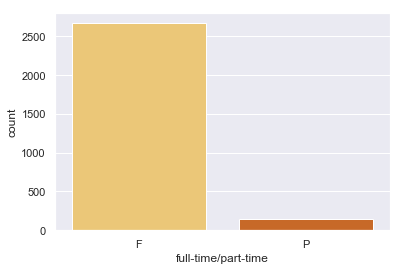

In [8]:
#Full time or Part time
sns.countplot(x='full-time/part-time', data=jobDetailsDF, palette=p)


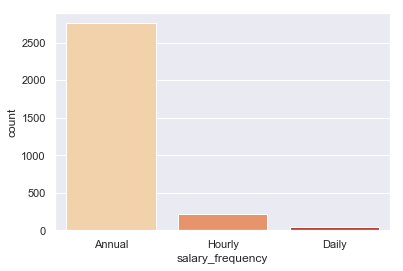

In [9]:
#Salary frequency
sns.countplot(x='salary_frequency', data=jobDetailsDF, palette=p2)


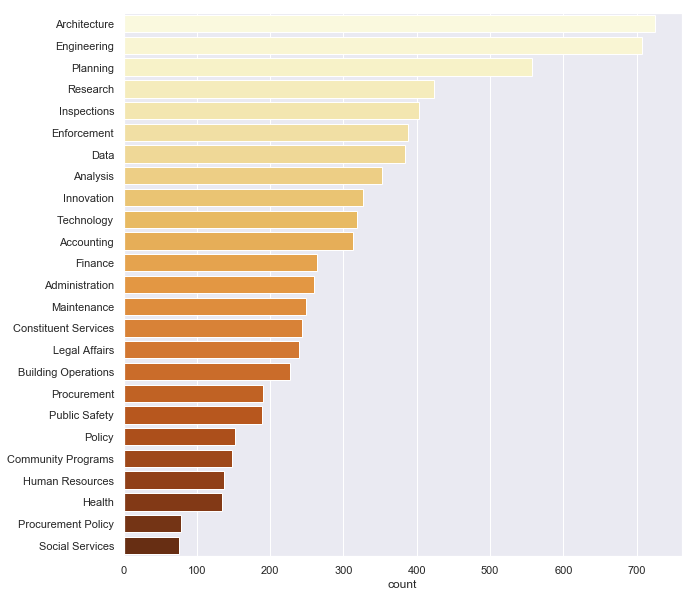

In [10]:

#Most in-demand job categories
plot.figure(figsize=(10,10))
sns.countplot(y=key_categories, order=frequentCategories.index, palette=p)


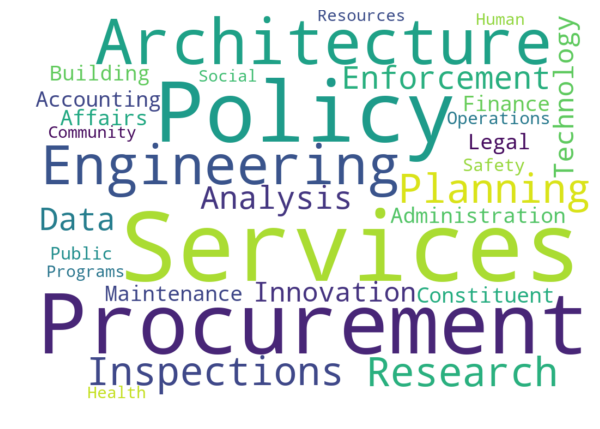

In [11]:
plot.figure(figsize=(10,8))
wordcloudForCategories(' '.join(frequentCategories.index.tolist()))


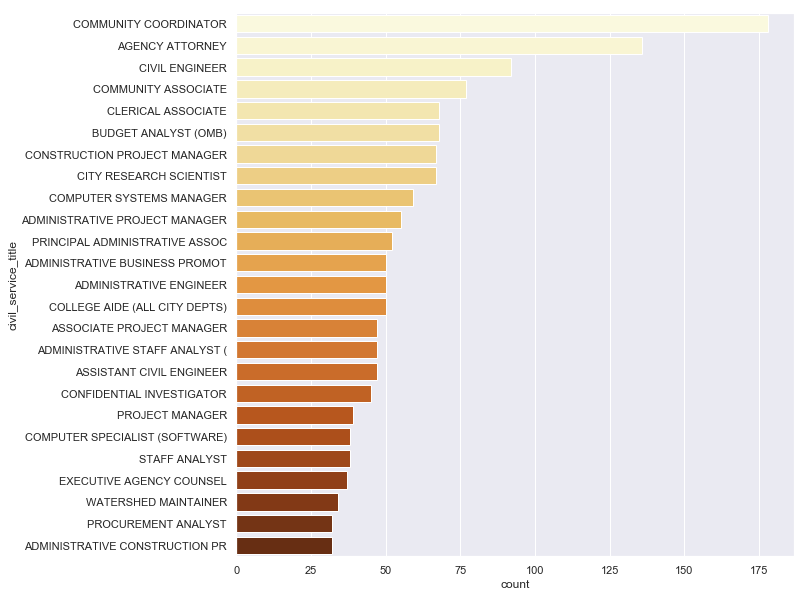

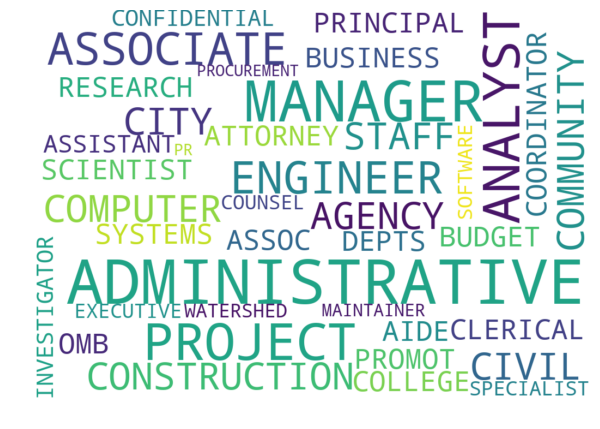

In [12]:
#Most popular job titles

plot.figure(figsize=(10,10))
titles_freq = jobDetailsDF.civil_service_title.value_counts()
popular_titles = titles_freq.iloc[:25]
sns.countplot(y="civil_service_title", data=jobDetailsDF, order=popular_titles.index, palette=p)

plot.figure(figsize=(10,8))
wordcloudForCategories(' '.join(popular_titles.index.tolist()))


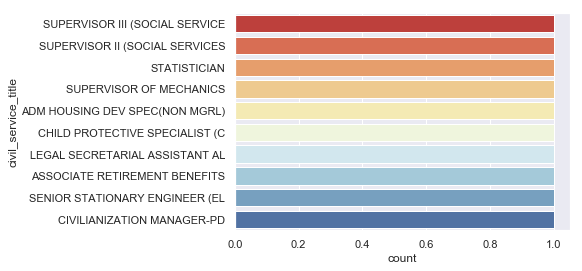

In [13]:
#Least popular job titles
least_popular = titles_freq.iloc[-10:]
sns.countplot(y="civil_service_title", data=jobDetailsDF, order=least_popular.index, palette=p3)


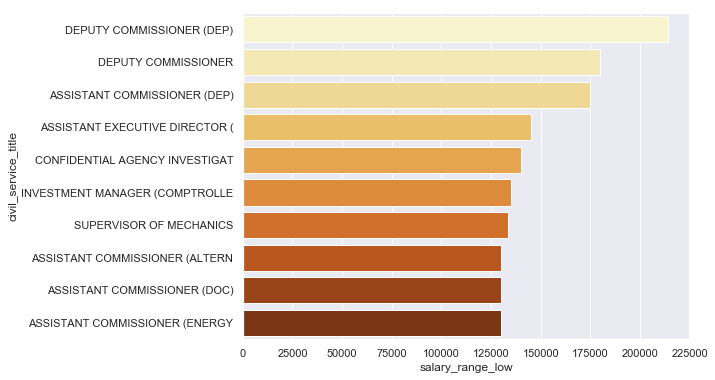

In [14]:
#Jobs with highest low salary range (annual)
salary_table = jobDetailsDF[['civil_service_title', 'salary_range_low', 'salary_range_high']]
jobs_highest_low_range = pd.DataFrame(salary_table.groupby(['civil_service_title'])['salary_range_low'].mean().nlargest(10)).reset_index()
plot.figure(figsize=(8,6))
sns.barplot(y='civil_service_title', x='salary_range_low', data=jobs_highest_low_range, palette=p)


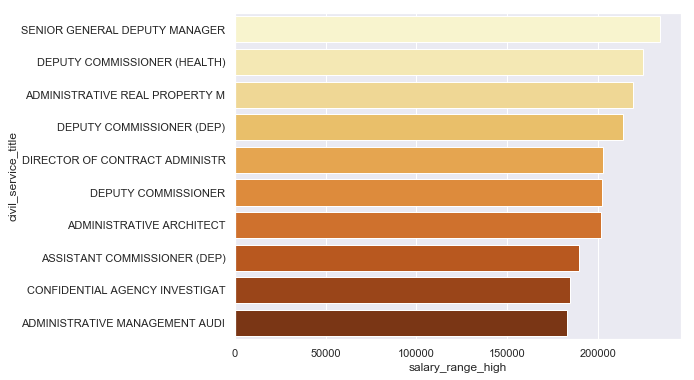

In [15]:
#Jobs with highest high salary range (annual)

jobs_highest_high_range = pd.DataFrame(salary_table.groupby(['civil_service_title'])['salary_range_high'].mean().nlargest(10)).reset_index()
plot.figure(figsize=(8,6))
sns.barplot(y='civil_service_title', x='salary_range_high', data=jobs_highest_high_range, palette=p)


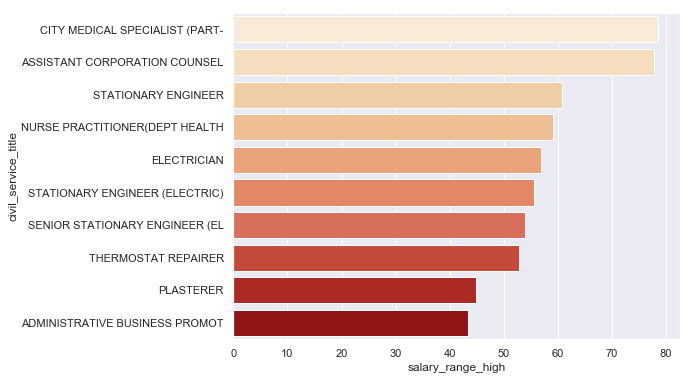

In [16]:

#Highest paying jobs on an hourly basis
hourly_jobs = jobDetailsDF[jobDetailsDF.salary_frequency == 'Hourly']
jobs_highest_high_range_hourly = pd.DataFrame(hourly_jobs.groupby(['civil_service_title'])['salary_range_high'].mean().nlargest(10)).reset_index()
plot.figure(figsize=(8,6))
sns.barplot(y='civil_service_title', x='salary_range_high', data=jobs_highest_high_range_hourly, palette=p2)



In [17]:

plot.figure(figsize=(10,8))
wordcloudForCategories(' '.join(jobs_highest_high_range_hourly['civil_service_title'].tolist()))


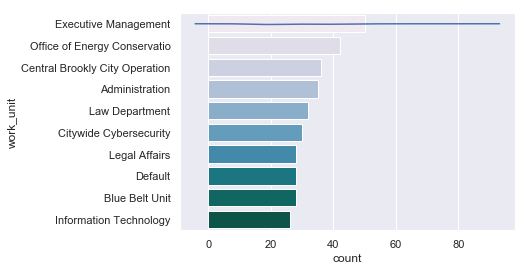

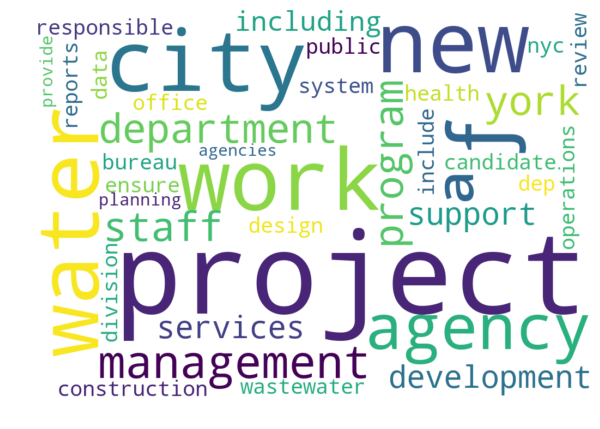

Engineering, Architecture, & Planning        545
Technology, Data & Innovation                283
Legal Affairs                                239
Building Operations & Maintenance            209
Public Safety, Inspections, & Enforcement    181
Name: job_category, dtype: int64

In [18]:

#Hourly jobs salary distribution
sns.distplot(hourly_jobs.salary_range_high)

#Popular work units
popular_divisions = jobDetailsDF.work_unit.value_counts().iloc[:10]
sns.countplot(y='work_unit', data=jobDetailsDF, order=popular_divisions.index, palette='PuBuGn')

#Popular work units

job_description_keywords = []
jobDetailsDF.job_description.apply(keyWordsAnalyse, l=job_description_keywords)
plot.figure(figsize=(10, 8))
counter = Counter(job_description_keywords)
common = [x[0] for x in counter.most_common(40)]
wordcloudForCategories(' '.join(common))

#Most popular preferred skills per job category

frequentCategories = jobDetailsDF.job_category.value_counts()[:5]
frequentCategories


In [ ]:
requiredSkillSet(frequentCategories.index[0]).iplot(title='engineering', kind='bar', color='khaki')


requiredSkillSet(frequentCategories.index[1]).iplot(title='technology', kind='bar', color='deepskyblue')

requiredSkillSet(frequentCategories.index[2]).iplot(title='public safety', kind='bar', color='green')


requiredSkillSet(frequentCategories.index[3]).iplot(title='health', kind='bar', color='powderblue')


requiredSkillSet(frequentCategories.index[4]).iplot(title='legal affairs', kind='bar', color='darkolivegreen')

#Minimum Qualification Wordcloud

qualification_keywords = []
jobDetailsDF.minimum_requirements.dropna().apply(keyWordsAnalyse, l=qualification_keywords)
plot.figure(figsize=(10, 8))
counter = Counter(qualification_keywords)
common = [x[0] for x in counter.most_common(40)]
wordcloudForCategories(' '.join(common))